# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset: https://www.kaggle.com/datasets/amirmotefaker/instagram-data

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [1]:
# import pandas, matplotlib, numpy

import pandas as pd
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np

# import dataset
# I had to change encoding to 'latin1'. I do not know why I needed this to read my data, and I do not know if it will 
# effect my code/data in the future

# Looking on stackoverflow, and speaking to my ta, this should not bring up any issues down the line. 

data = pd.read_csv("instagram-data-clean", encoding = "latin1")

# check that data is loaded

print(data.head())

   Unnamed: 0  Impressions  From Home  From Hashtags  From Explore  \
0           0         3920       2586           1028           619   
1           1         5394       2727           1838          1174   
2           2         4021       2085           1188             0   
3           3         4528       2700            621           932   
4           4         2518       1704            255           279   

   From Other  Saves  Comments  Shares  Likes  Profile Visits  Follows  \
0          56     98         9       5    162              35        2   
1          78    194         7      14    224              48       10   
2         533     41        11       1    131              62       12   
3          73    172        10       7    213              23        8   
4          37     96         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of th

## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

C:\Users\molli\AppData\Local\Temp\ipykernel_17024\3026930689.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap="YlGnBu", annot = True, linewidths=.3)


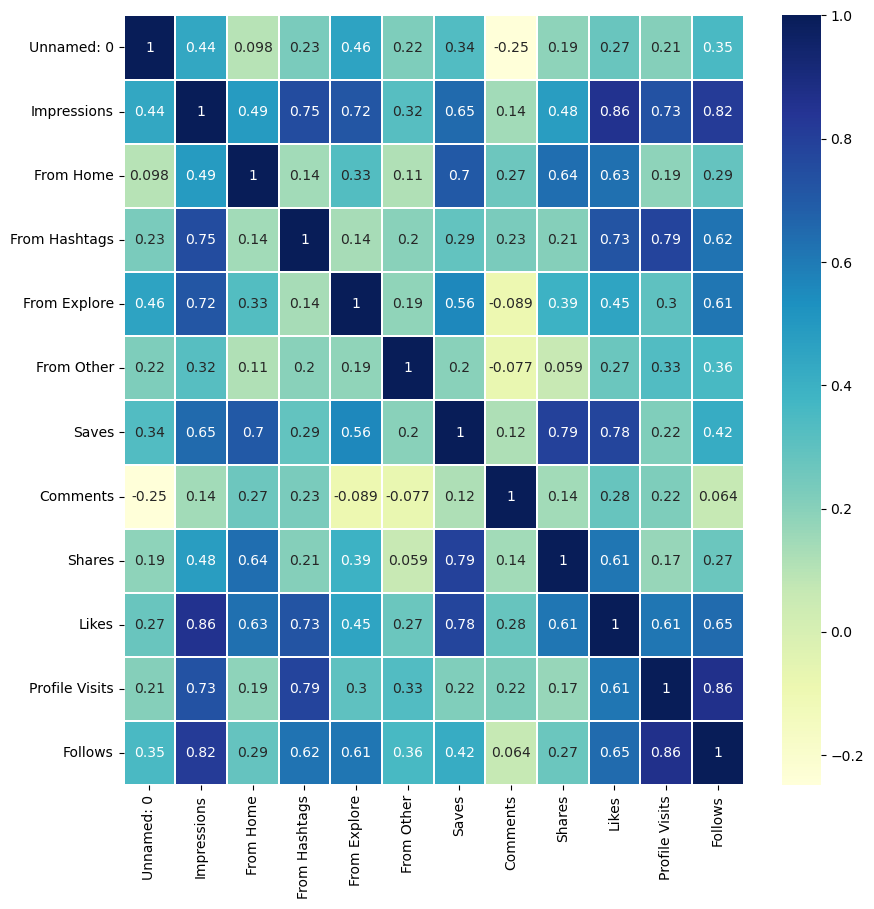

In [2]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True, linewidths=.3)
plt.show()

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [3]:
X = data['Saves']
Y = data['Shares']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

# Take a look at the train dataset
X_train
y_train

32     4
6      1
3      7
12    11
51    16
      ..
79     6
87    15
67    15
24     3
8      8
Name: Shares, Length: 70, dtype: int64

In [5]:
# Import Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Print the parameters
lr.params

# Perform a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Shares   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     124.9
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           4.75e-17
Time:                        19:37:46   Log-Likelihood:                -207.02
No. Observations:                  70   AIC:                             418.0
Df Residuals:                      68   BIC:                             422.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8437      0.881      0.958      0.342      -0.914       2.602
Saves          0.0519      0.005     11.177      0.000       0.043       0.061
==============================================================================
Omnibus:                       15.009   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.093
Skew:                           0.915   Prob(JB):                     7.14e-05
Kurtosis:                       4.789   Cond. No.                         296.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

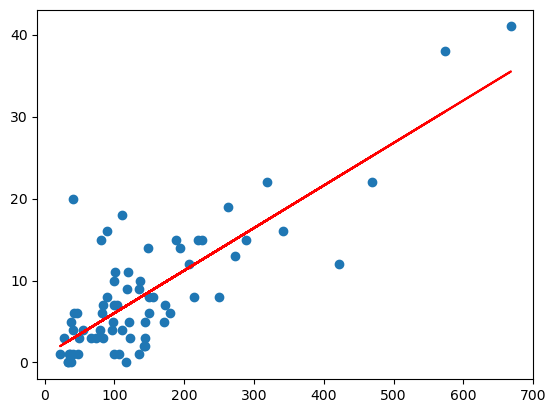

In [7]:
# Visualize the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 0.8437 + 0.0519*X_train, 'r')
plt.show()

## Error Terms

Finally, plot your error terms!

C:\Users\molli\AppData\Local\Temp\ipykernel_17024\3336180004.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


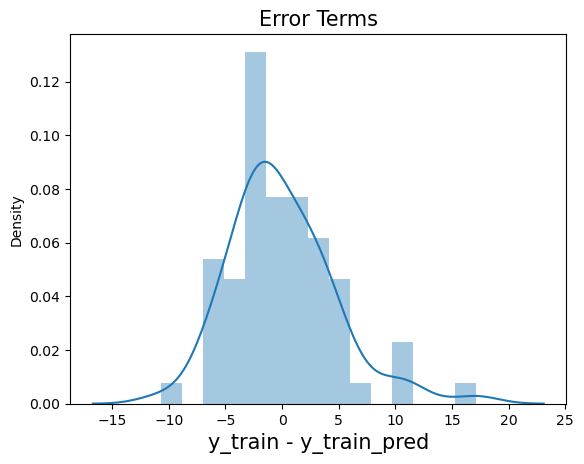

In [11]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.648
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? I feel that this model was effective with my dataset, as it mostly consists of integers that have an established relationship. 
3. Was your plot of the error terms a bell curve? Mostly yes